In [1]:
import numpy as np
import keras
from keras import backend as k
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.preprocessing.image import load_img
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
mobileV2 = keras.applications.mobilenet_v2.MobileNetV2(input_shape=(75,75,3), alpha=1.0, include_top=False, weights='imagenet', input_tensor=None, pooling='avg', classes=1000)

C:\Users\HP\Anaconda3\envs\tensorflow\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '
W0524 11:18:24.736521 27540 deprecation_wrapper.py:119] From C:\Users\HP\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0524 11:18:24.779408 27540 deprecation_wrapper.py:119] From C:\Users\HP\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0524 11:18:24.788382 27540 deprecation_wrapper.py:119] From C:\Users\HP\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_u

In [3]:
train_path = 'F:/Data/Data_aug/Training' 
valid_path = 'F:/Data/Data_aug/Validation'
test_path = 'F:/Data/Data_aug/Test'

In [4]:
train_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(train_path,target_size=(75,75),classes=['cable','no'],batch_size = 10)
valid_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(valid_path,target_size=(75,75),classes=['cable','no'],batch_size = 10)
test_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(test_path,target_size=(75,75),classes=['cable','no'],batch_size = 10,shuffle = False)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [5]:
x = mobileV2.layers[-1].output
predictions = Dense(2,activation = 'softmax')(x)
model = Model(inputs=mobileV2.input,outputs=predictions)

In [6]:
for layer in model.layers[:-2]:
    layer.trainable = False

In [7]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 75, 75, 3)    0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 77, 77, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 38, 38, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 38, 38, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

In [8]:
model.compile(Adam(lr=.00001),loss='categorical_crossentropy',metrics=['accuracy'])

W0524 11:18:41.736683 27540 deprecation_wrapper.py:119] From C:\Users\HP\Anaconda3\envs\tensorflow\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [9]:
model.fit_generator(train_batches,steps_per_epoch=2000,validation_data = valid_batches,validation_steps=500,epochs=100,verbose=2)

W0524 11:18:41.962689 27540 deprecation.py:323] From C:\Users\HP\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
 - 723s - loss: 0.8151 - acc: 0.5487 - val_loss: 1.1765 - val_acc: 0.5084
Epoch 2/100
 - 426s - loss: 0.7005 - acc: 0.6196 - val_loss: 1.0431 - val_acc: 0.5264
Epoch 3/100
 - 359s - loss: 0.6397 - acc: 0.6681 - val_loss: 0.9618 - val_acc: 0.5460
Epoch 4/100
 - 304s - loss: 0.5966 - acc: 0.7032 - val_loss: 0.8645 - val_acc: 0.5706
Epoch 5/100
 - 281s - loss: 0.5795 - acc: 0.7094 - val_loss: 0.8299 - val_acc: 0.5784
Epoch 6/100
 - 309s - loss: 0.5566 - acc: 0.7316 - val_loss: 0.8261 - val_acc: 0.5858
Epoch 7/100
 - 303s - loss: 0.5496 - acc: 0.7354 - val_loss: 0.7930 - val_acc: 0.5956
Epoch 8/100
 - 307s - loss: 0.5332 - acc: 0.7472 - val_loss: 0.7550 - val_acc: 0.6130
Epoch 9/100
 - 299s - loss: 0.5241 - acc: 0.7508 - val_loss: 0.7462 - val_acc: 0.6158
Epoch 10/100
 - 303s - loss: 0.5242 - acc: 0.7521 - val_loss: 0.7434 - val_acc: 0.6194
Epoch 11/100
 - 323s - loss: 0.5170 - acc: 0.7576 - val_loss: 0.7291 - val_acc: 0.6234
Epoch 12/100
 - 331s - loss: 0.5047 - acc: 0.7633 - 

In [10]:
test_labels = test_batches.classes

In [11]:
predictions = model.predict_generator(test_batches,steps=20,verbose=0)

In [12]:
cm = confusion_matrix(test_labels,predictions.argmax(axis=1))

In [13]:
test_batches.class_indices

{'cable': 0, 'no': 1}

In [14]:
#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization
[[64 36]
 [27 73]]


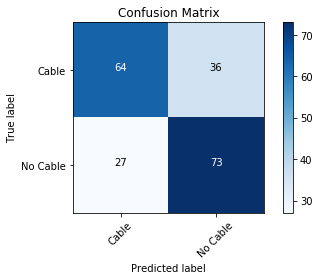

In [15]:
cm_plot_labels = ['Cable','No Cable']
plot_confusion_matrix(cm,cm_plot_labels,title= 'Confusion Matrix')

In [16]:
ground_truth = test_batches.classes
label2index = test_batches.class_indices
 
# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())
predicted_classes = np.argmax(predictions,axis=1)
errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),test_batches.samples))

No of errors = 63/200


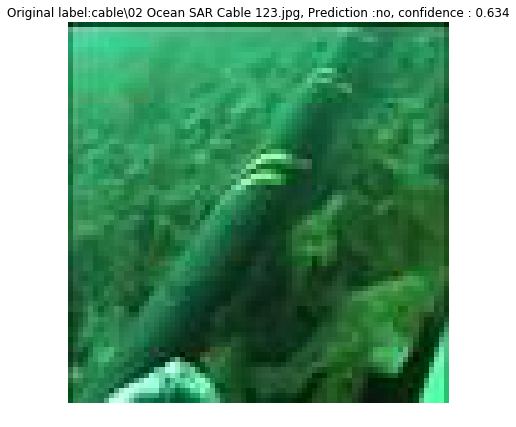

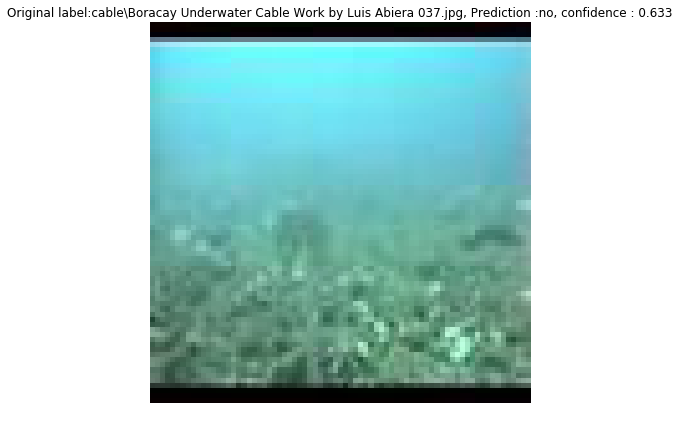

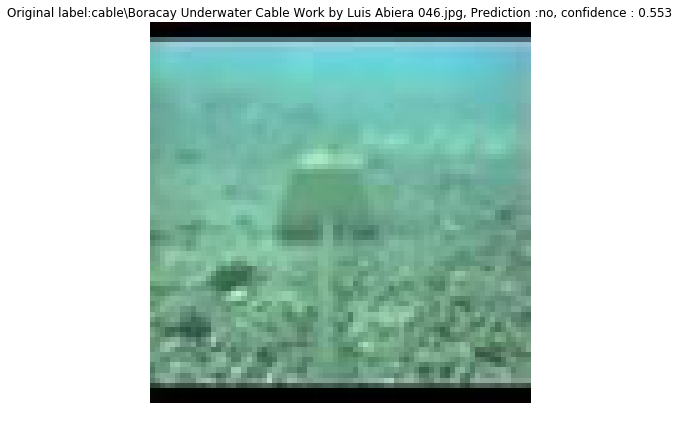

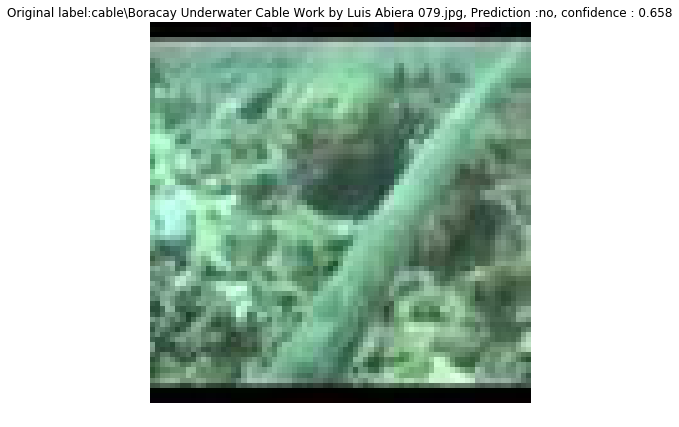

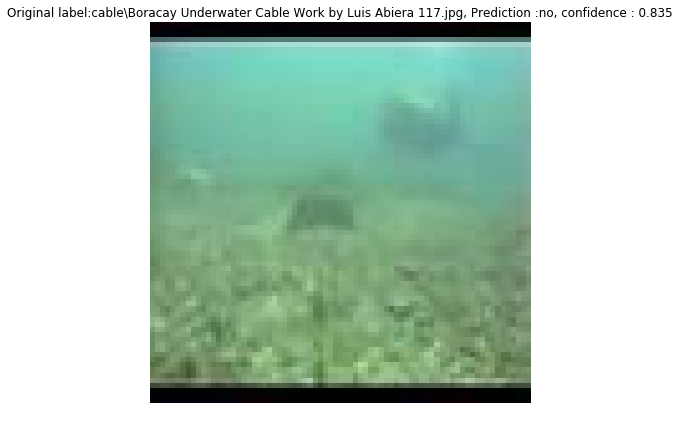

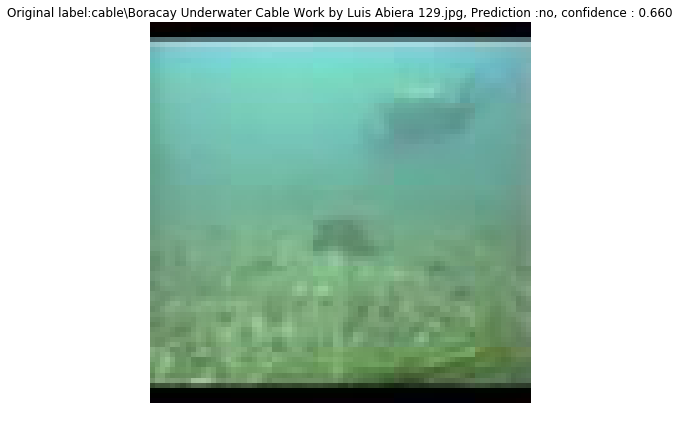

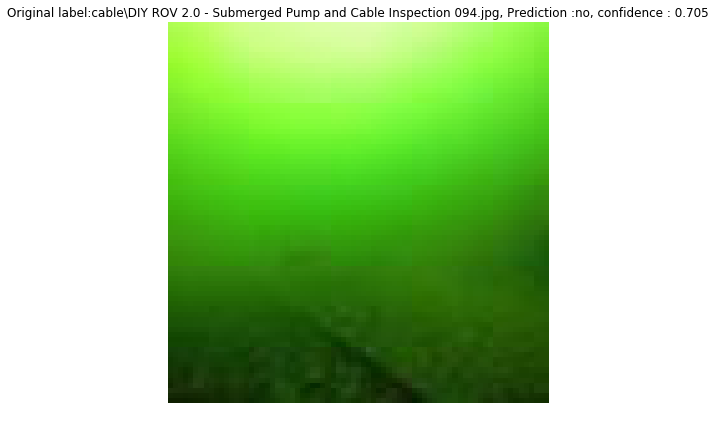

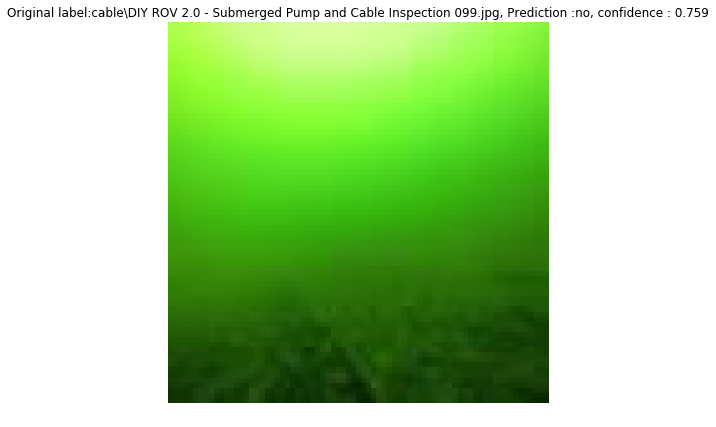

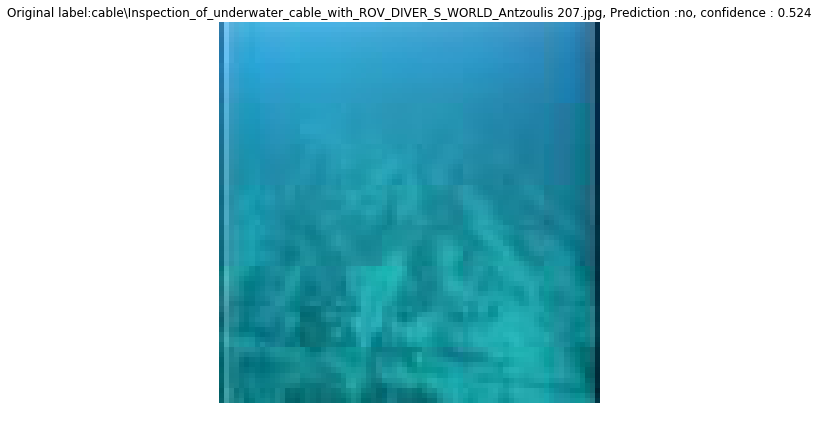

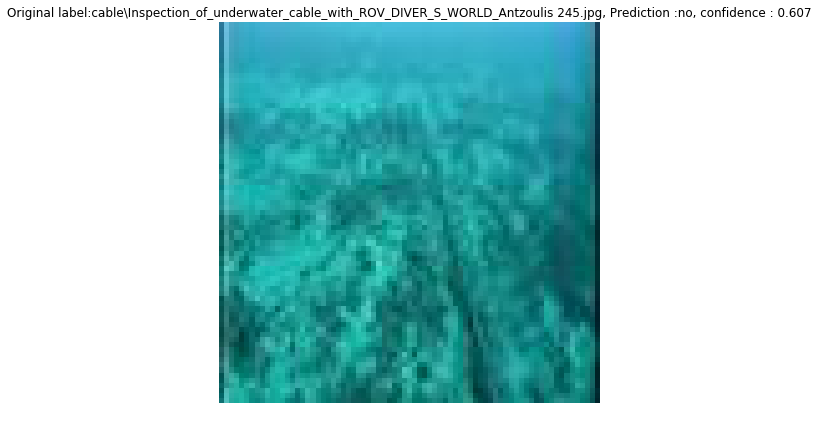

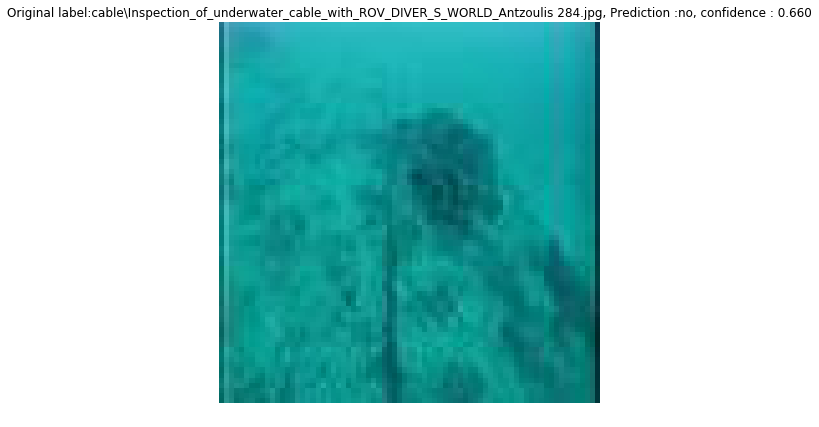

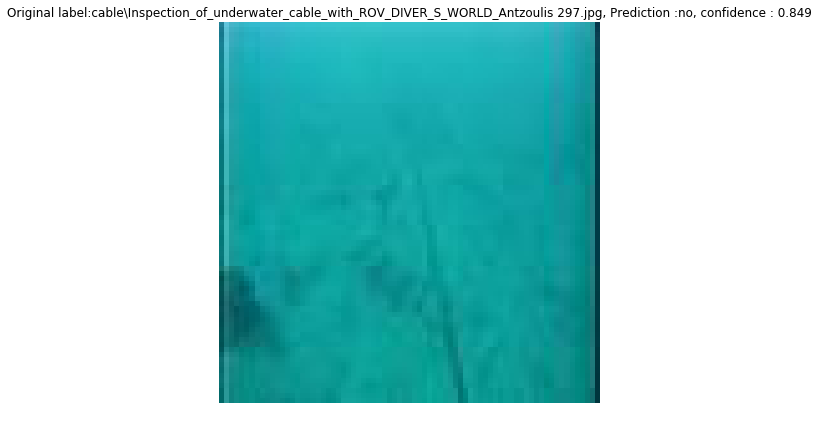

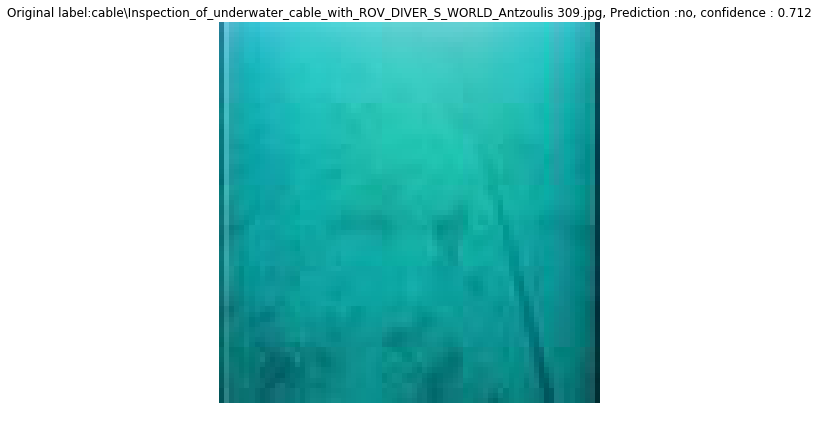

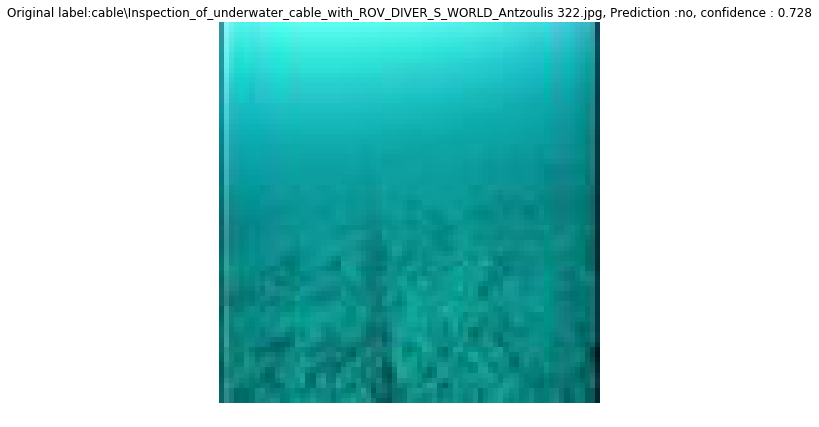

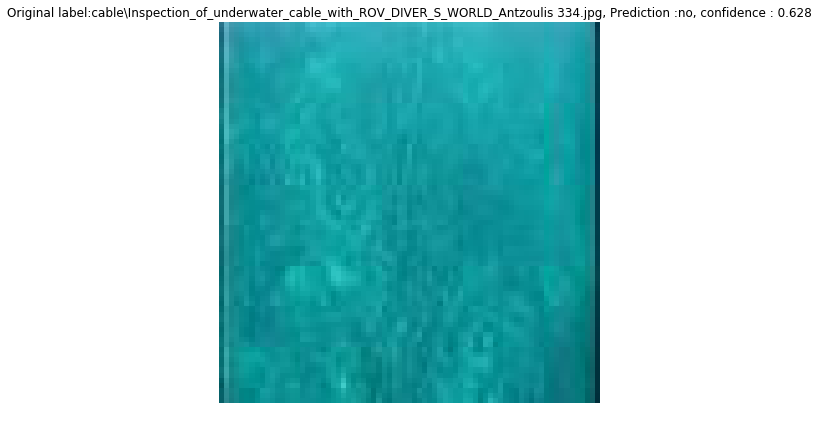

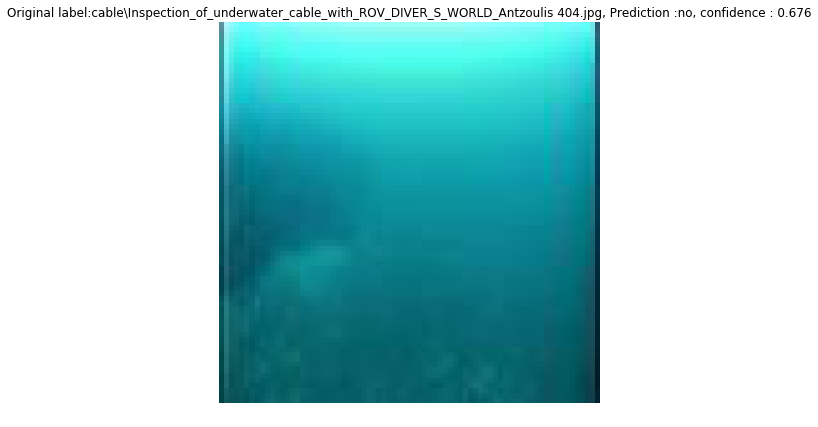

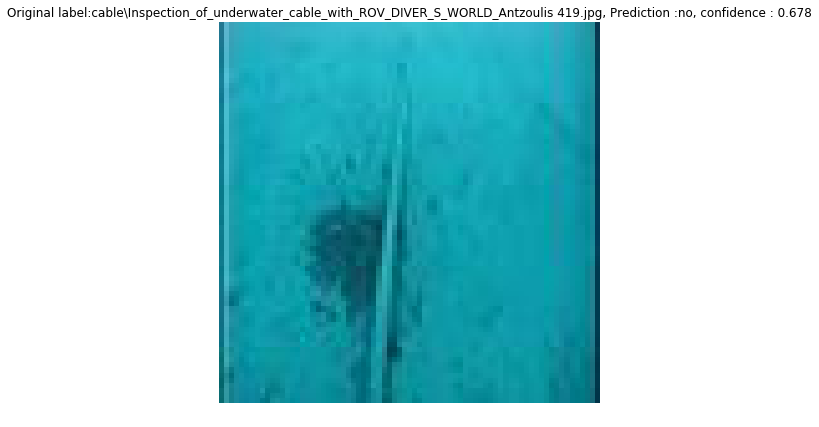

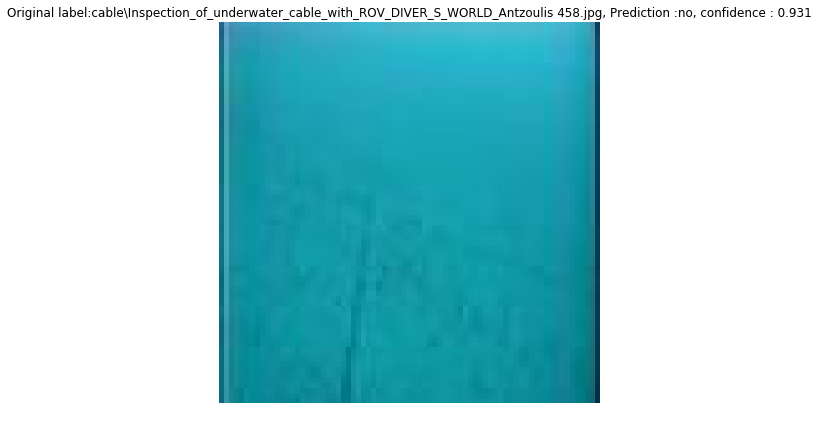

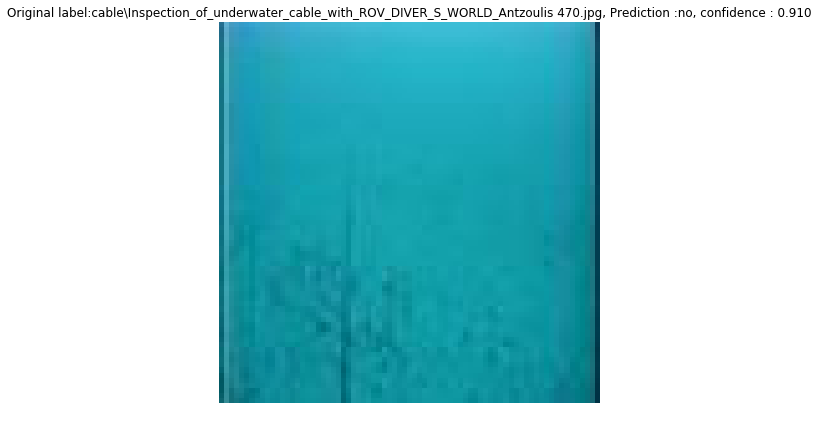

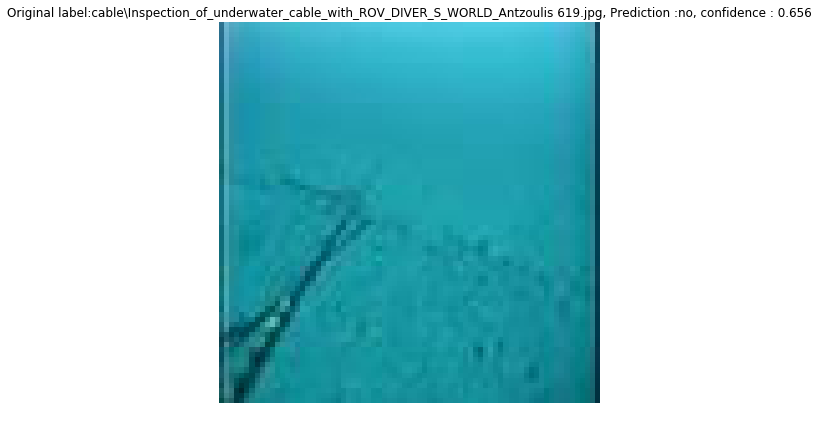

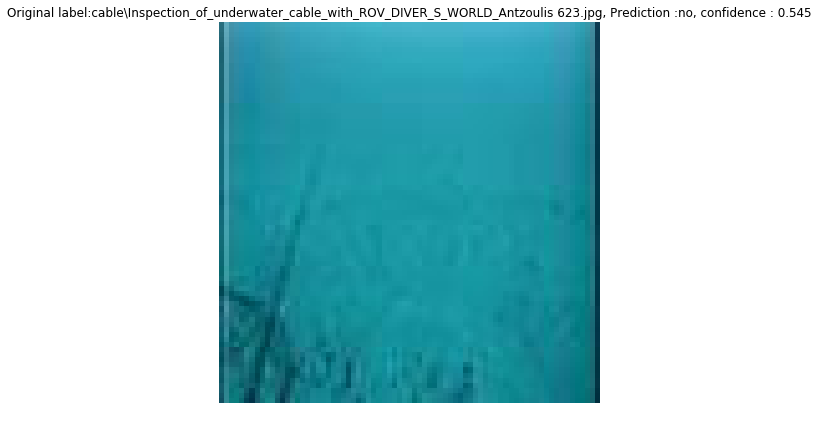

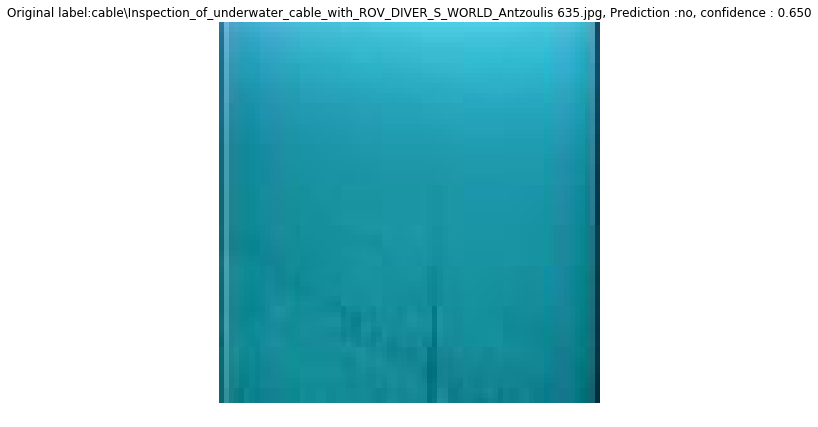

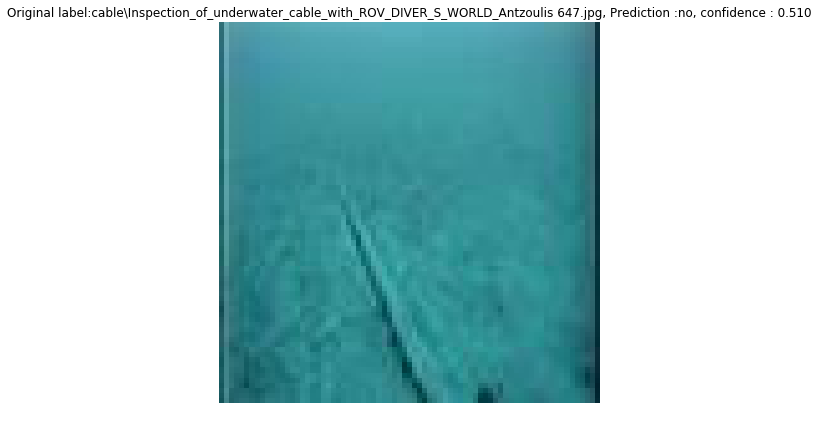

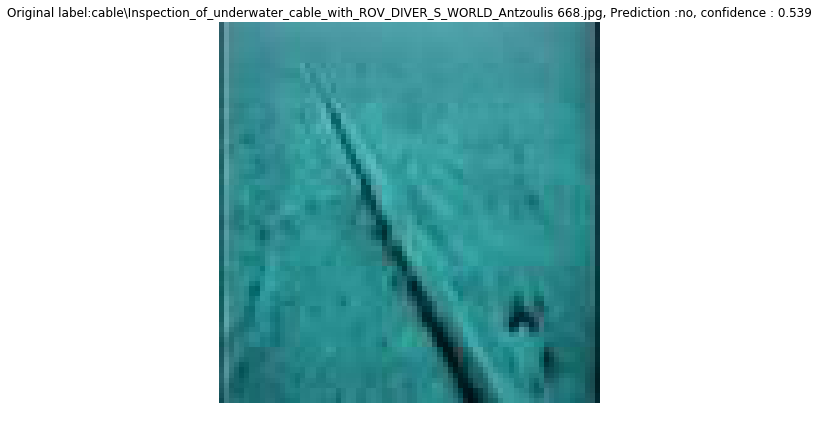

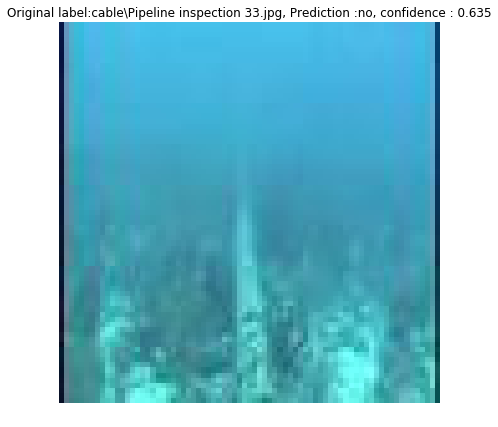

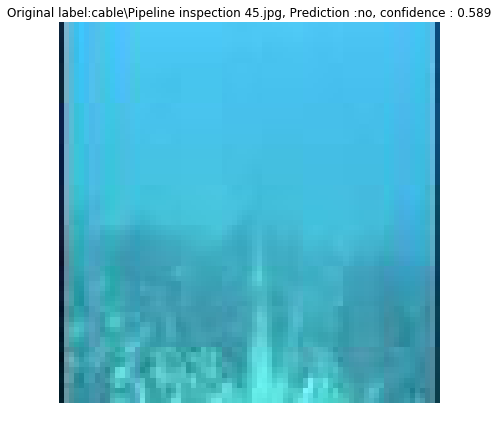

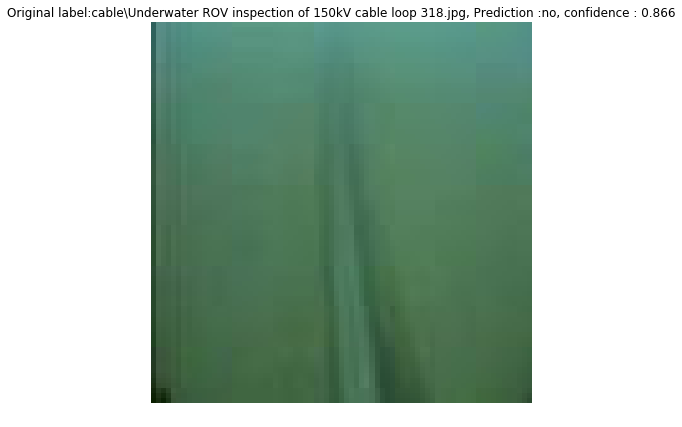

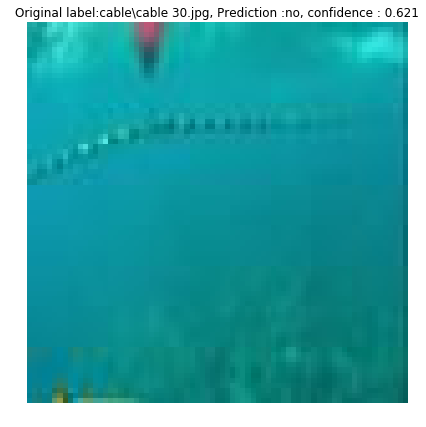

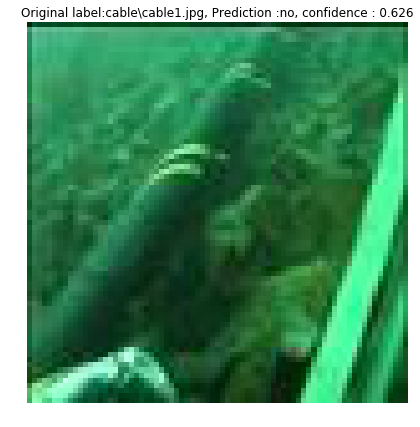

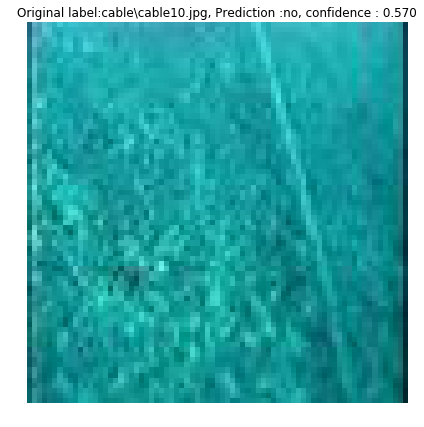

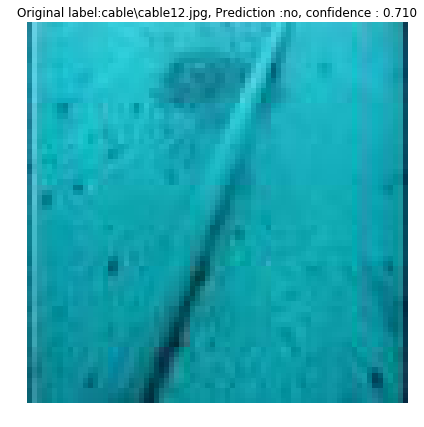

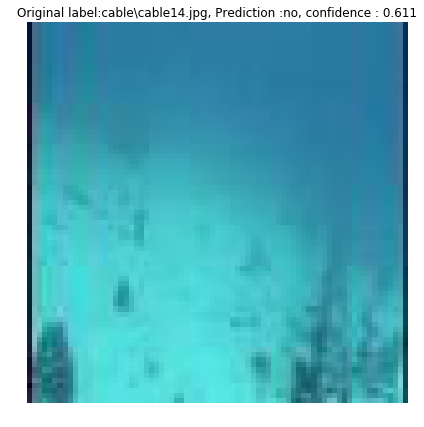

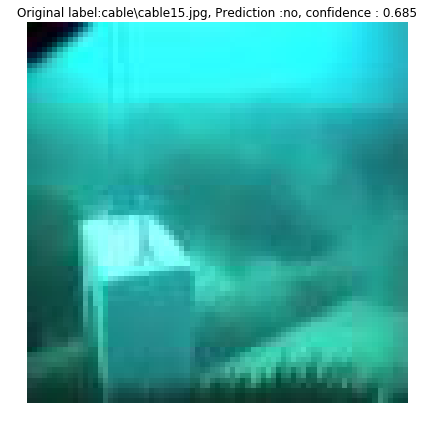

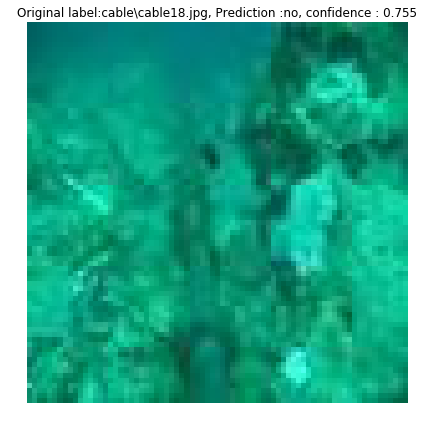

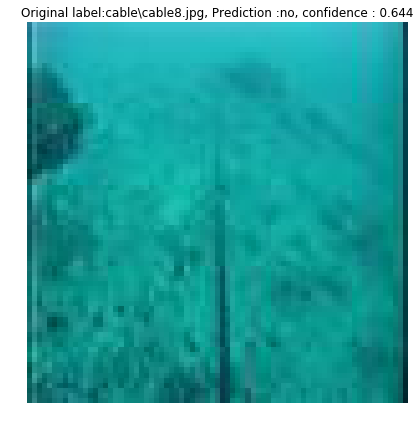

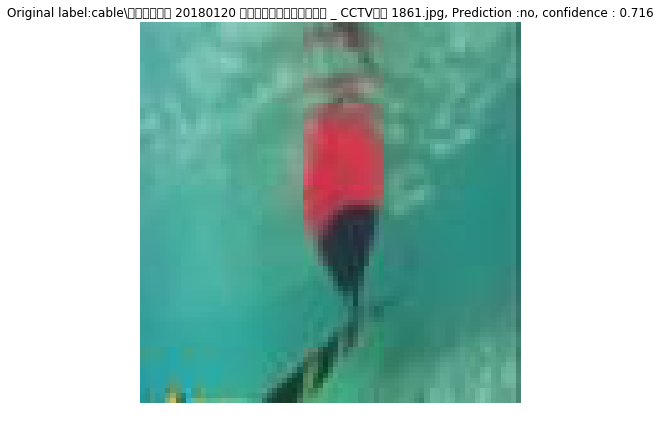

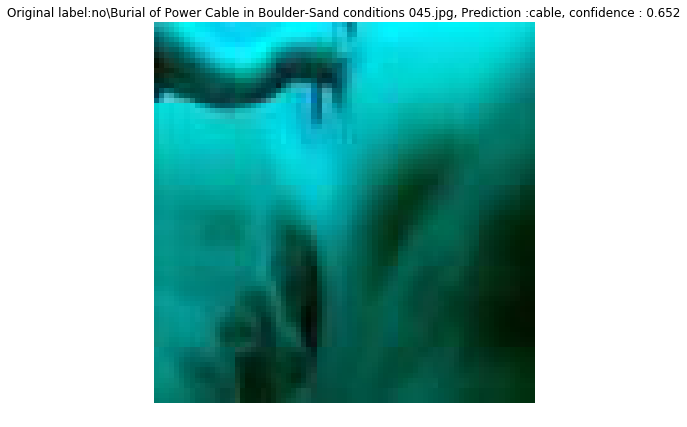

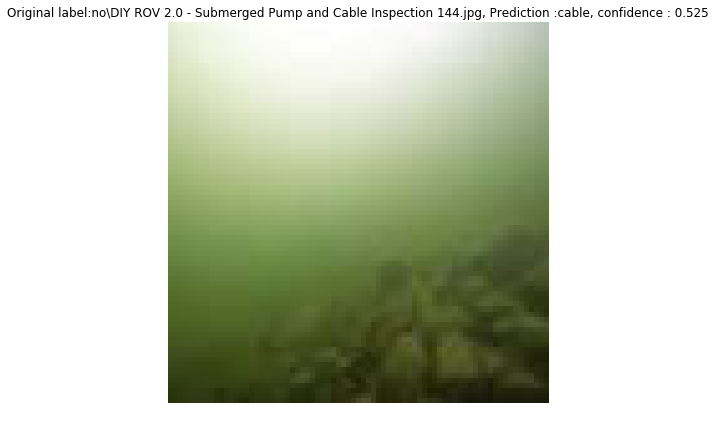

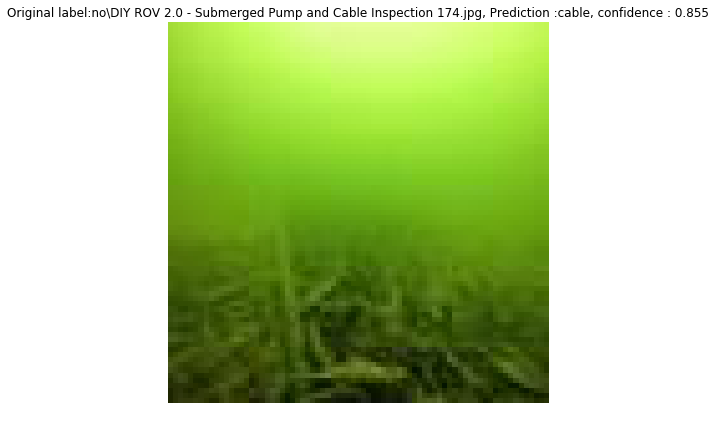

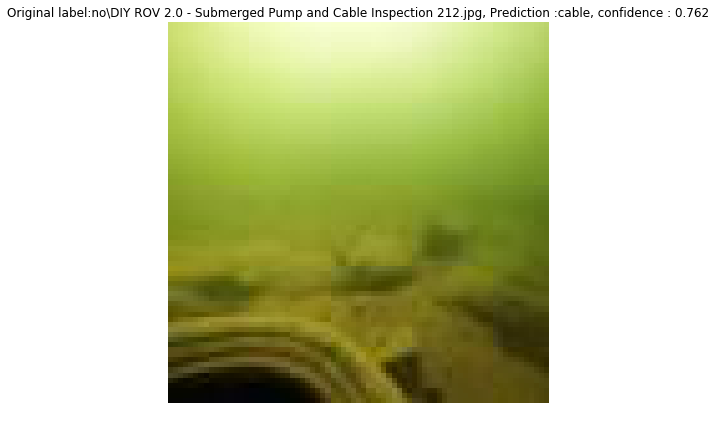

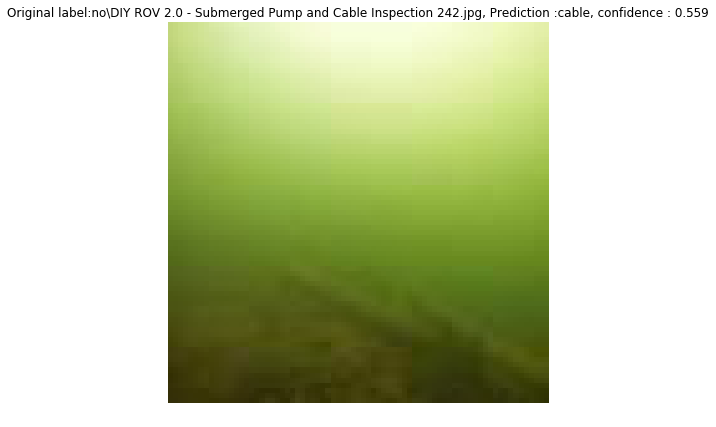

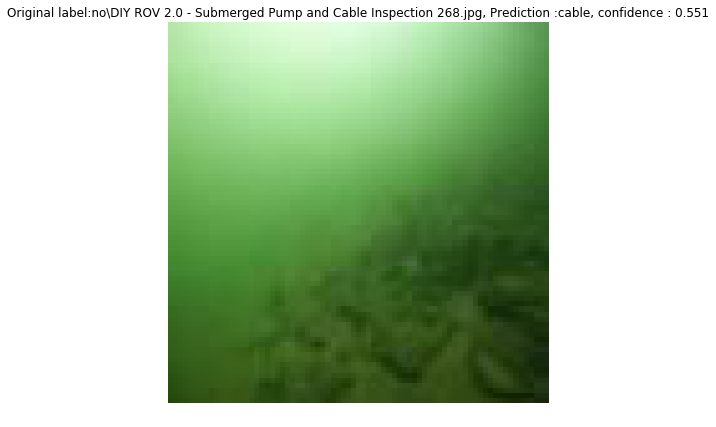

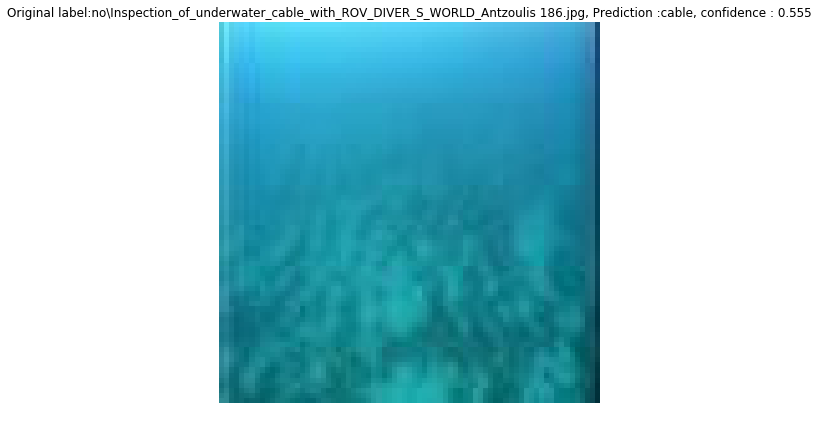

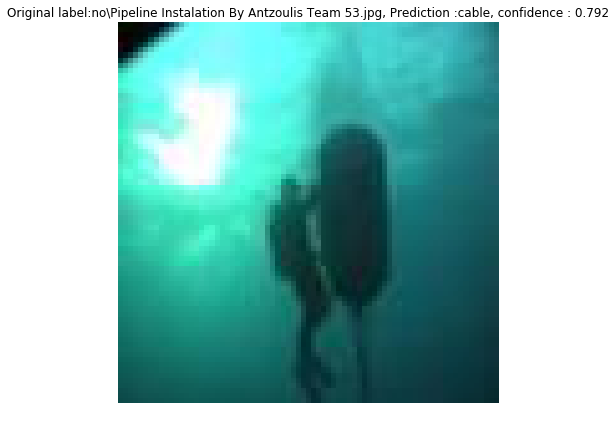

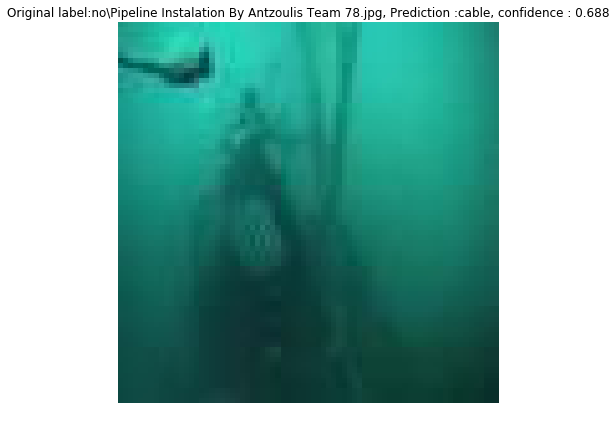

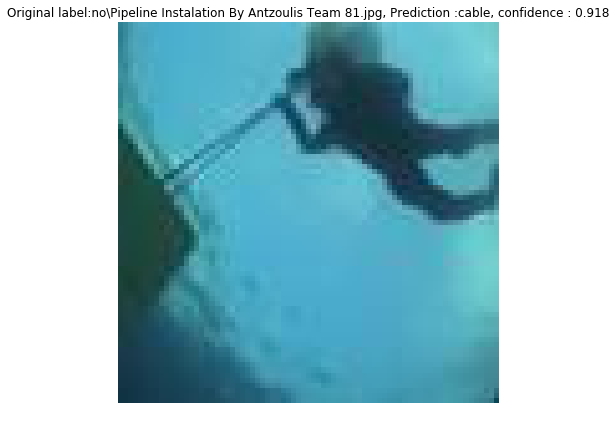

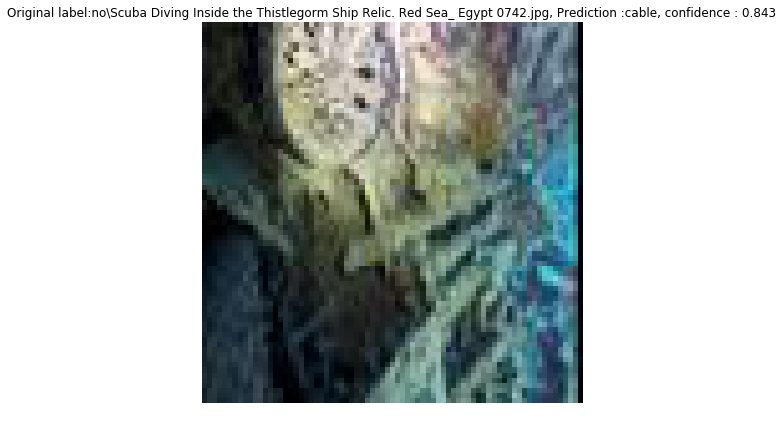

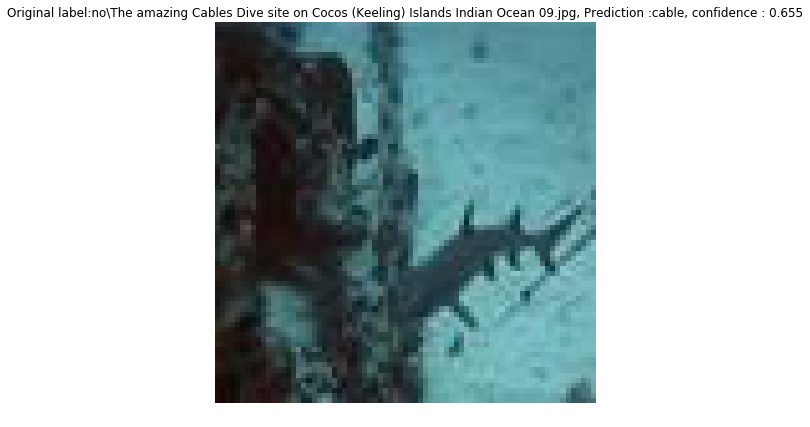

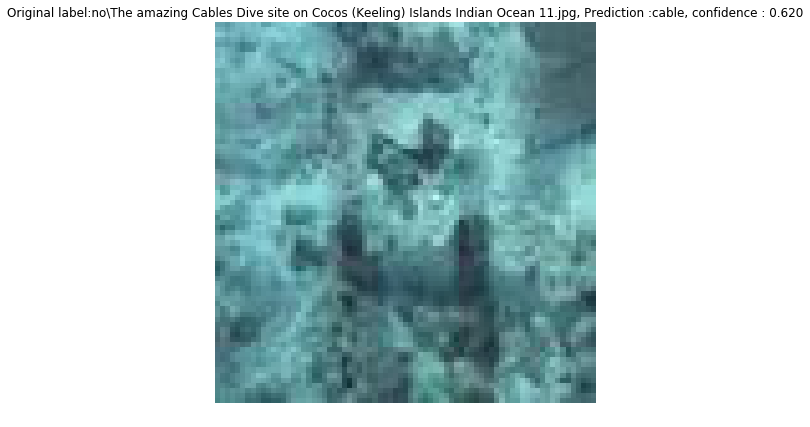

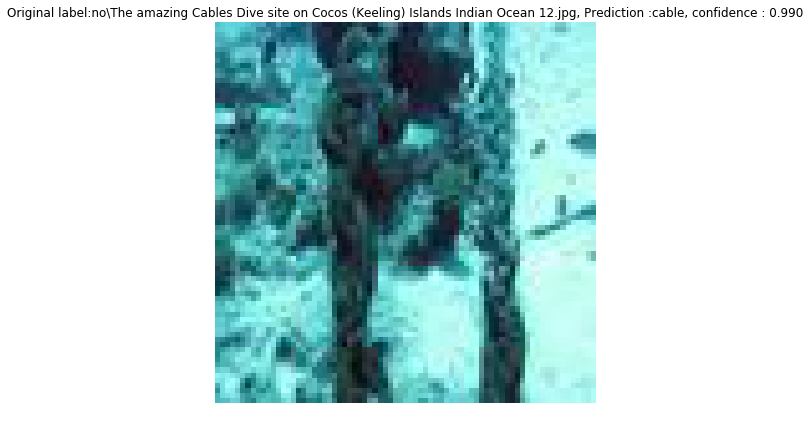

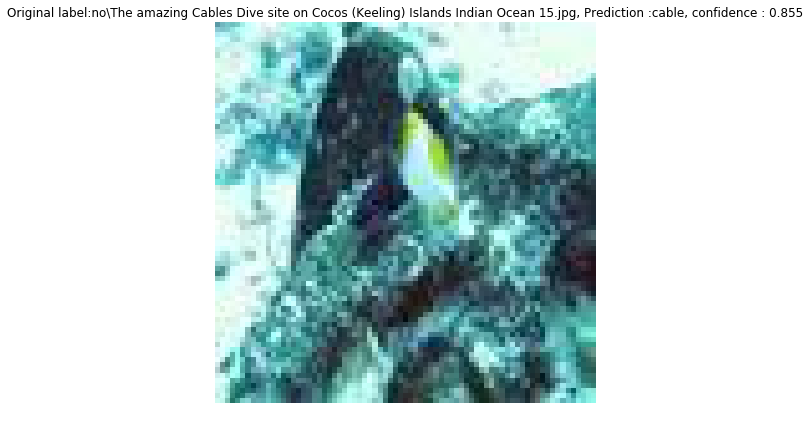

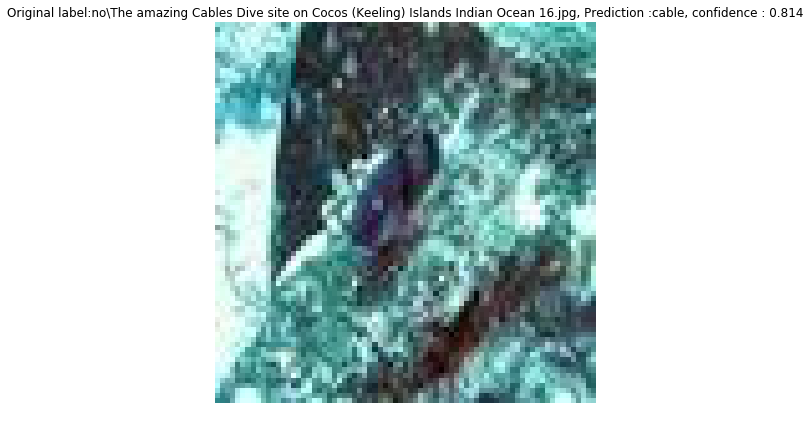

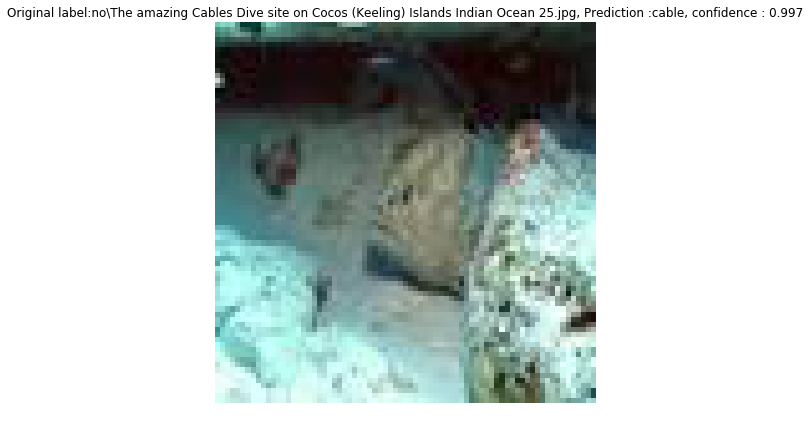

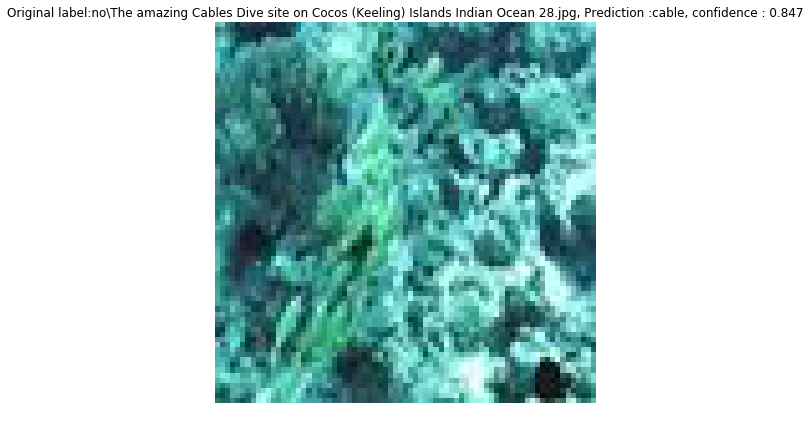

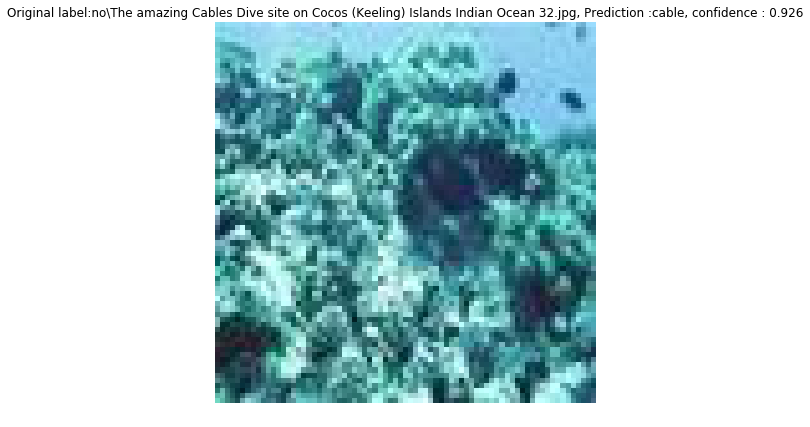

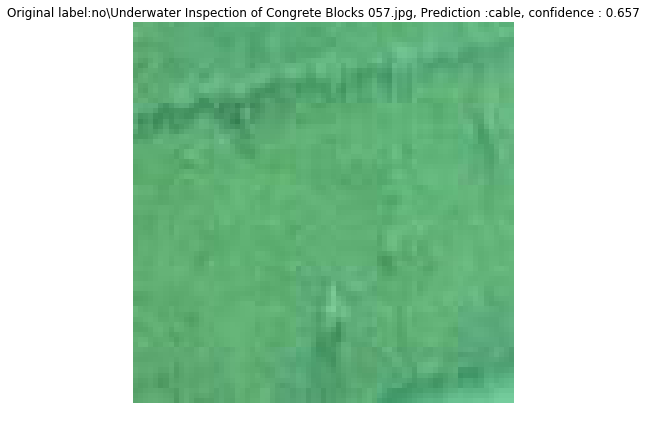

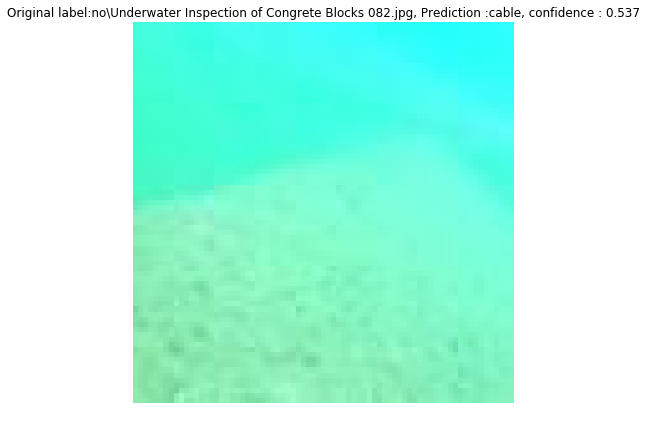

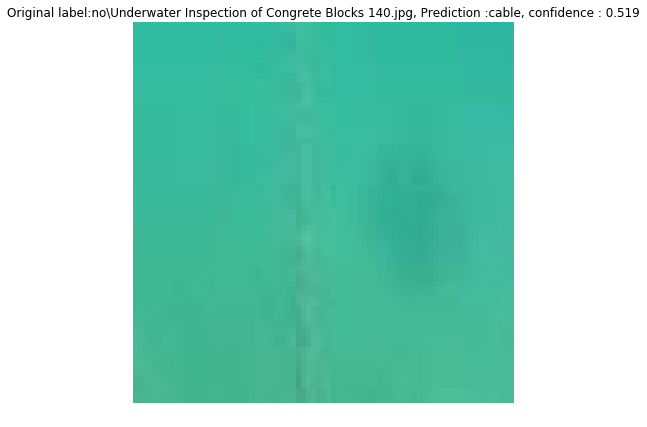

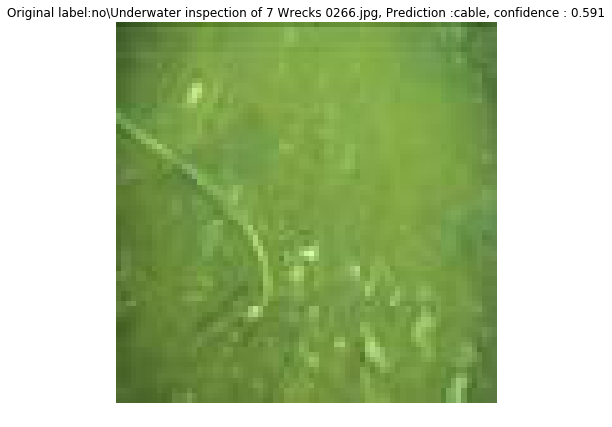

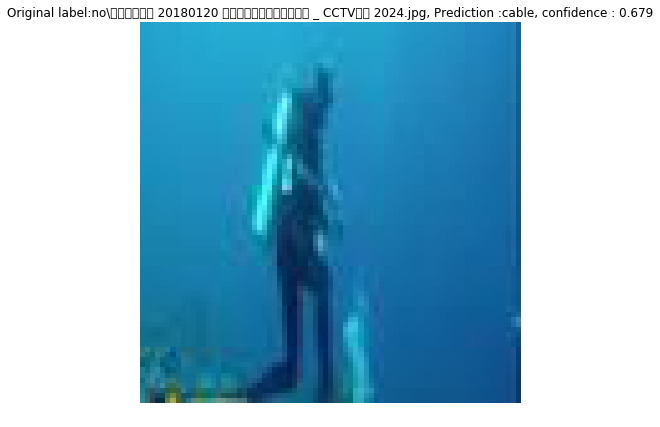

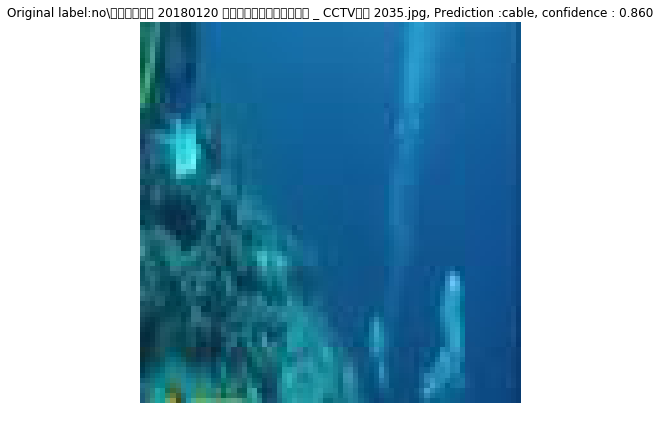

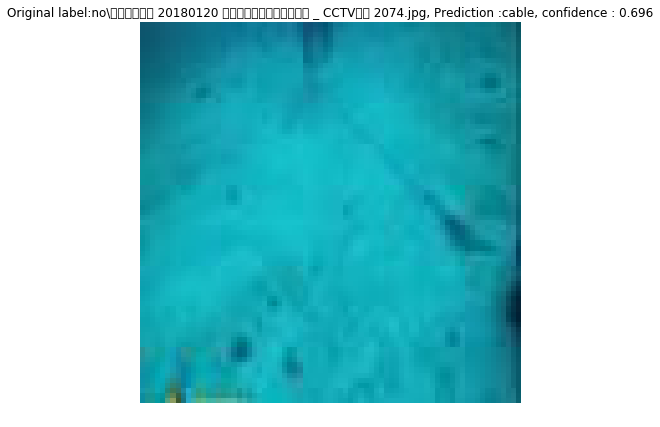

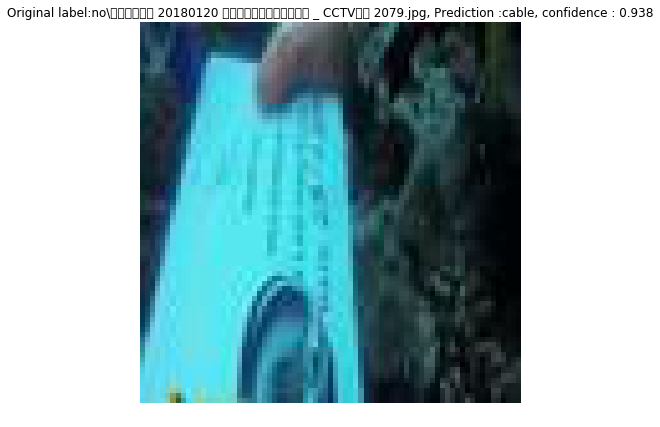

In [17]:
fnames = test_batches.filenames
for i in range(len(errors)):
    pred_class = np.argmax(predictions[errors[i]])
    pred_label = idx2label[pred_class]
     
    title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        fnames[errors[i]].split('/')[0],
        pred_label,
        predictions[errors[i]][pred_class])
     
    original = load_img('{}/{}'.format(test_path,fnames[errors[i]]))
    plt.figure(figsize=[7,7])
    plt.axis('off')
    plt.title(title)
    plt.imshow(original)
    plt.show()

In [18]:
from sklearn.metrics import classification_report
print(classification_report(test_labels,predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67       100
           1       0.67      0.73      0.70       100

   micro avg       0.69      0.69      0.69       200
   macro avg       0.69      0.69      0.68       200
weighted avg       0.69      0.69      0.68       200



In [19]:
model.save('classification_of_cable_with_mobilenetV2_finetuning_75_dataaug.h5')